# Building a Machine Learning model

After pre-processing the data and selecting the appropriate features for the model, we can move onto building the actual model step. We now want to be able to make predictions on this data. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from math import sqrt

In [4]:
X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')
y_train = X_train['SalePrice']
y_test = X_test['SalePrice']
X_train.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,931,12.211060,0.000000,0.75,0.461171,0.377048,1.0,1.0,0.333333,1.000000,...,0.0,0.0,0.0,0.75,1.0,0.0,0.783092,0.75,0.666667,0.75
1,657,11.887931,0.000000,0.75,0.456066,0.399443,1.0,1.0,0.333333,0.333333,...,0.0,0.0,0.0,0.50,1.0,0.0,0.836829,0.50,0.666667,0.75
2,46,12.675764,0.795881,0.75,0.394699,0.347082,1.0,1.0,0.000000,0.333333,...,0.0,0.0,0.0,0.75,1.0,0.0,0.278943,1.00,0.666667,0.75
3,1349,12.278393,0.000000,0.75,0.388581,0.493677,1.0,1.0,0.666667,0.666667,...,0.0,0.0,0.0,0.75,1.0,0.0,0.836829,0.25,0.666667,0.75
4,56,12.103486,0.000000,0.75,0.577658,0.402702,1.0,1.0,0.333333,0.333333,...,0.0,0.0,0.0,0.75,1.0,0.0,0.783092,0.50,0.666667,0.75


In [5]:
features = pd.read_csv('selected_features.csv', header=None)
features = [x for x in features[0]] 
X_train = X_train[features]
X_test = X_test[features]

In [6]:
lin_model = Lasso(alpha=0.005, random_state=0) # remember to set the random_state / seed
lin_model.fit(X_train, y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)

Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

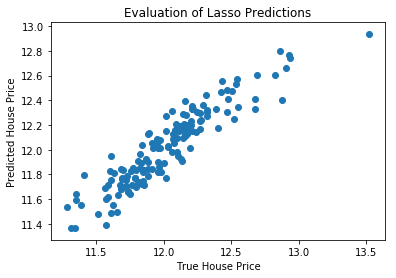

In [7]:
pred = lin_model.predict(X_test)
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

Text(0.5, 1.0, 'Feature Importance')

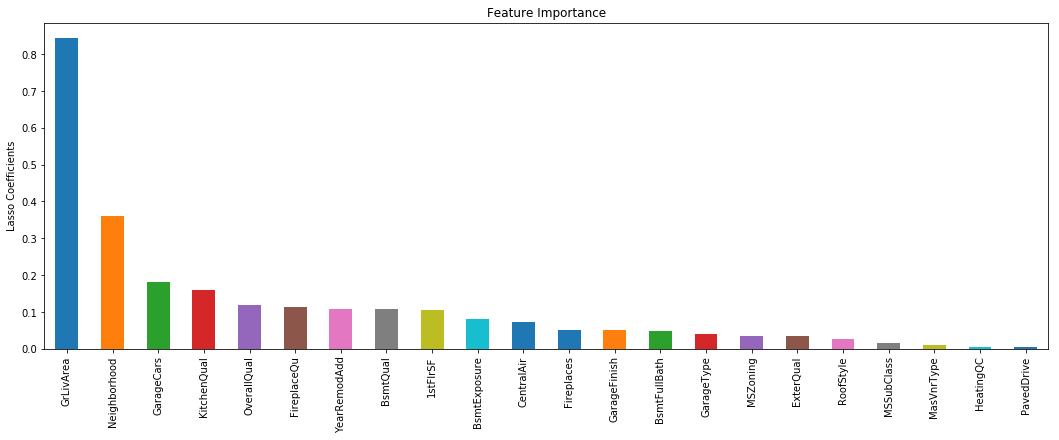

In [8]:
importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')